# The purpose of this file is to separate the tedious work of data checking / organization from the main notebook. If you wish to view the main project, please close this file and refer to the `main_notebook.ipynb` file.

---

## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import os
import random
import shutil

## Observing the Raw Data
Randomly pull 15 images from cracked wall images and normal wall images from the data. `Positive` directory contains cracked images while `Negative` driectory contains uncracked images

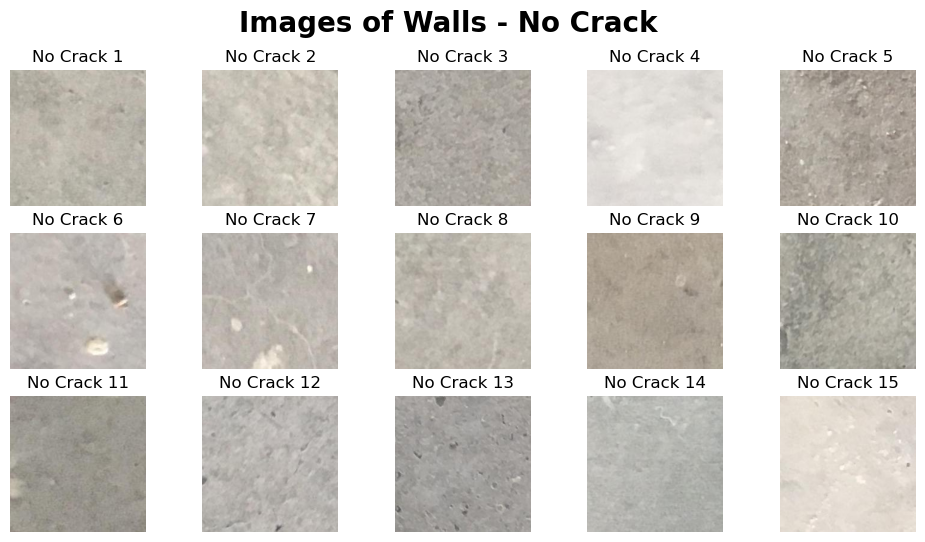

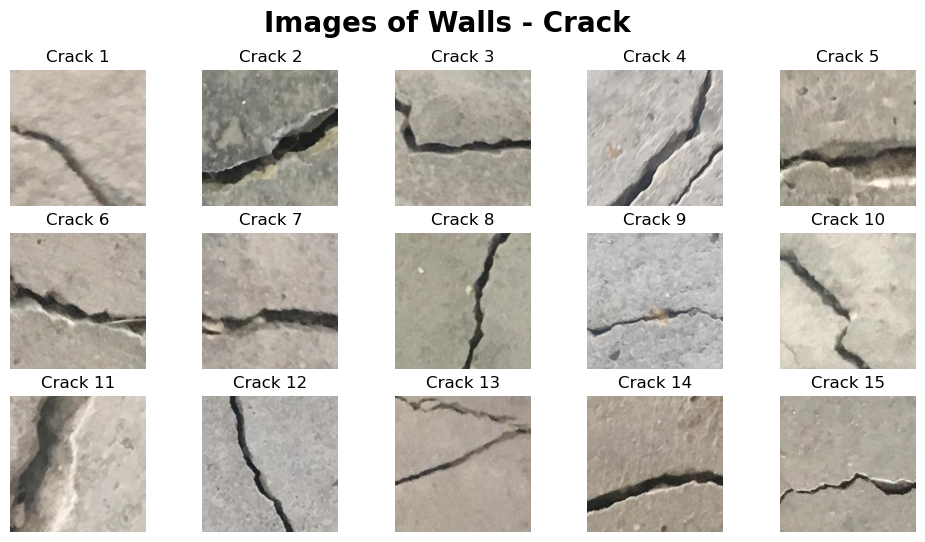

In [2]:
# Assign directory paths to negative and positive data
negative_dir = 'data/Negative'
positive_dir = 'data/Positive'

# Randomly pull fifteen negative images
negative_files = os.listdir(negative_dir)
random.shuffle(negative_files)
negative_files_random = negative_files[:15]

# Randomly pull fifteen positive images
positive_files = os.listdir(positive_dir)
random.shuffle(positive_files)
positive_files_random = positive_files[:15]

# Plot random negative images
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
for i in range(15):
    row = i // 5
    col = i % 5
    image_path = os.path.join(negative_dir, negative_files_random[i])
    image = plt.imread(image_path)
    ax[row, col].imshow(image)
    ax[row, col].axis('off')
    ax[row, col].set_title(f'No Crack {i+1}')
plt.suptitle("Images of Walls - No Crack", fontsize=20, fontweight='bold')
plt.show()
print("\n"*3)

# Plot random positive images
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
for i in range(15):
    row = i // 5
    col = i % 5
    image_path = os.path.join(positive_dir, positive_files_random[i])
    image = plt.imread(image_path)
    ax[row, col].imshow(image)
    ax[row, col].axis('off')
    ax[row, col].set_title(f'Crack {i+1}')
plt.suptitle("Images of Walls - Crack", fontsize=20, fontweight='bold')
plt.show()

- Some no-crack images have patterns that the model can mis interpret as cracks.
- Some crack images have very thin cracks that the model can mistake for a lined pattern.

While most images are easily distinguishable there are some images on the borderline that are difficult to calssify.



## Splitting Data into Train, Validation and Test Set
We will use train_test_split method from sklearn to make a split. We will first split data into training set (train set + validation set) and `test set`. Then, We will further split the training set into `train set` and `validation set`.

### Making the Split

In [3]:
# Assign directory paths
train_positive_dir = 'data/train/positive'
train_negative_dir = 'data/train/negative'
val_positive_dir = 'data/val/positive'
val_negative_dir = 'data/val/negative'
test_positive_dir = 'data/test/positive'
test_negative_dir = 'data/test/negative'

# Create directories
os.makedirs(train_positive_dir)
os.makedirs(train_negative_dir)
os.makedirs(val_positive_dir)
os.makedirs(val_negative_dir)
os.makedirs(test_positive_dir)
os.makedirs(test_negative_dir)

In [4]:
# First split data into training set and test set
training_positive_files, test_positive_files = train_test_split(positive_files, test_size=0.1, random_state=817)
training_negative_files, test_negative_files = train_test_split(negative_files, test_size=0.1, random_state=817)

# Then split traning data into train set and validation set
train_positive_files, val_positive_files = train_test_split(training_positive_files, test_size=(1/9), random_state=817)
train_negative_files, val_negative_files = train_test_split(training_negative_files, test_size=(1/9), random_state=817)

In [5]:
# Define a function to copy files into created directories
def copy_files(src_dir, src_list, dst_dir):
    """This function copies files in src_list from src_dir to dst_dir."""
    for filename in src_list:
        file_path = os.path.join(src_dir, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dst_dir)

In [6]:
# Fill created positive directories with positive files
copy_files(positive_dir, train_positive_files, train_positive_dir)
copy_files(positive_dir, val_positive_files, val_positive_dir)
copy_files(positive_dir, test_positive_files, test_positive_dir)

# Fill created negative directories with negative files
copy_files(negative_dir, train_negative_files, train_negative_dir)
copy_files(negative_dir, val_negative_files, val_negative_dir)
copy_files(negative_dir, test_negative_files, test_negative_dir)

### Checking the Split: File Counts

In [7]:
# Define a function to do file counts for each directory
def print_file_counts(file_directory):
    """This function prints the number of files in the given directory."""
    print(f"Number of files in {file_directory}: {len(os.listdir(file_directory))}")

In [8]:
# Check how many files are in each directory
print_file_counts(train_positive_dir)
print_file_counts(train_negative_dir)
print_file_counts(val_positive_dir)
print_file_counts(val_negative_dir)
print_file_counts(test_positive_dir)
print_file_counts(test_negative_dir)

Number of files in data/train/positive: 16000
Number of files in data/train/negative: 16000
Number of files in data/val/positive: 2000
Number of files in data/val/negative: 2000
Number of files in data/test/positive: 2000
Number of files in data/test/negative: 2000


### Checking the Split: Visualizations

In [9]:
# Create a function that will take random 10 sample images from each directory and plot them
def plot_sample_images(file_directory):
    """This function takes a file directory as input and plots random 10 images in that directory."""
    files = os.listdir(file_directory)
    random.shuffle(files)
    random_files = files[:10]
    fig, ax = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(10):
        row = i // 5
        col = i % 5
        image_path = os.path.join(file_directory, random_files[i])
        image = plt.imread(image_path)
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        plt.suptitle(f"Sample Images from\n{file_directory}", fontsize=20, fontweight='bold')
    plt.show()

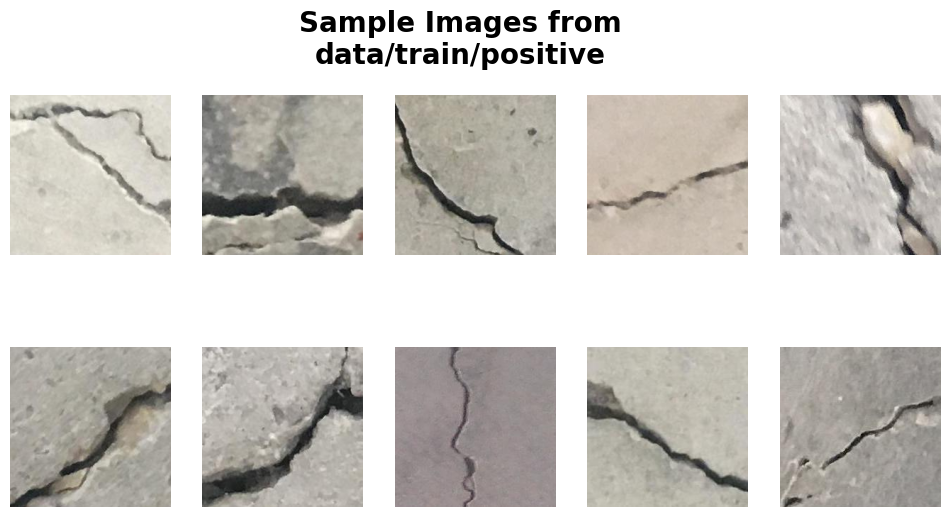

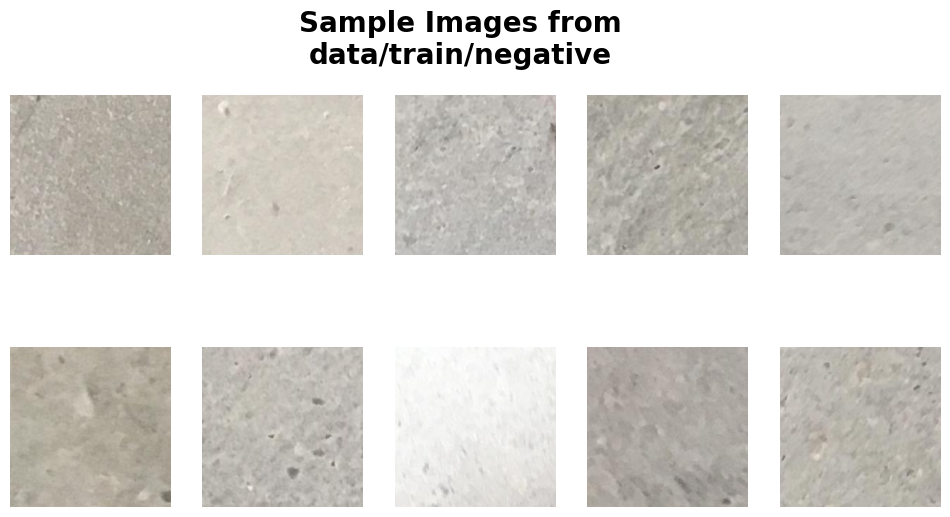

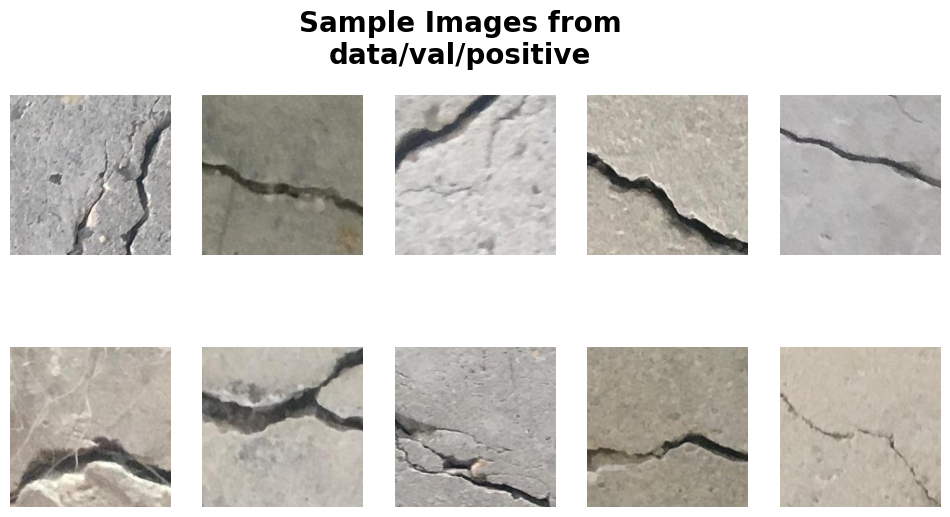

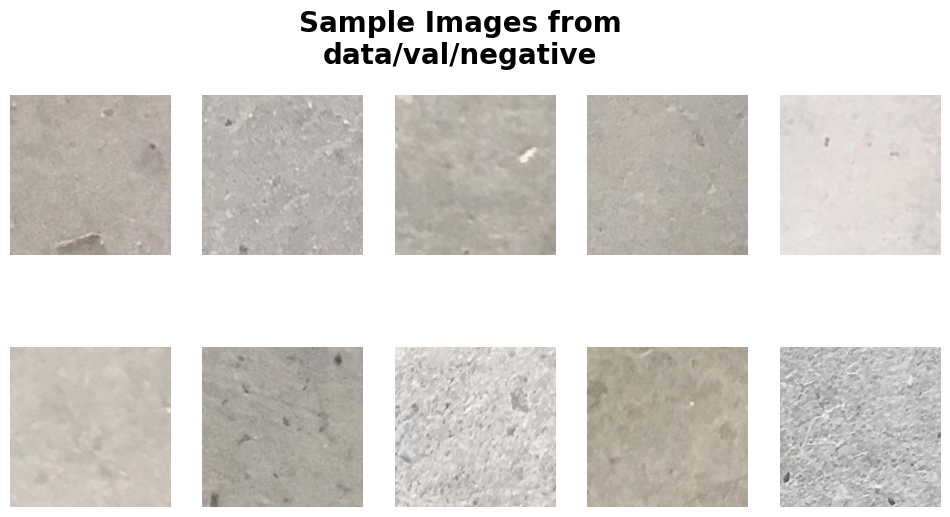

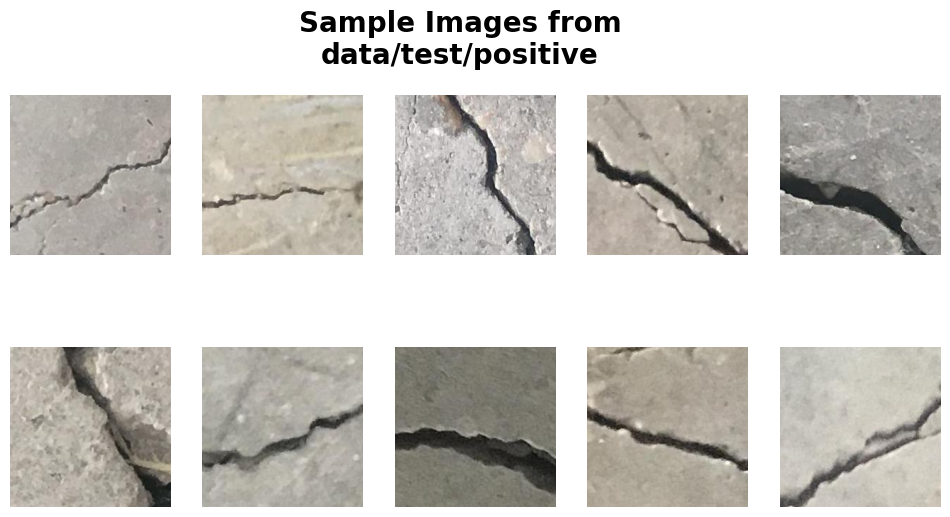

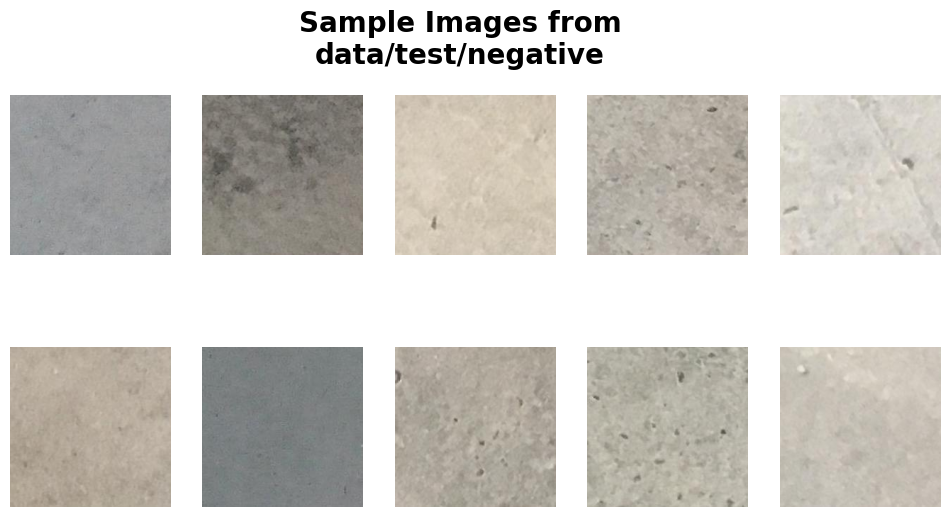

In [10]:
# Print 10 random images from each directory
plot_sample_images(train_positive_dir)
print("\n\n")
plot_sample_images(train_negative_dir)
print("\n\n")
plot_sample_images(val_positive_dir)
print("\n\n")
plot_sample_images(val_negative_dir)
print("\n\n")
plot_sample_images(test_positive_dir)
print("\n\n")
plot_sample_images(test_negative_dir)

It seems certain now all the work related to splitting data is done correctly. We will create a new notebook `main_notebook.ipynb` and do main work there.

### Deleting Original Positive and Negative Directories

In [12]:
# Remove Negative directory
negative_dir = 'data/Negative'
if os.path.exists(negative_dir):
    shutil.rmtree(negative_dir)
    print(f'Removed {negative_dir} directory.')
else:
    print(f'{negative_dir} directory does not exist.')

# Remove Positive directory
positive_dir = 'data/Positive'
if os.path.exists(positive_dir):
    shutil.rmtree(positive_dir)
    print(f'Removed {positive_dir} directory.')
else:
    print(f'{positive_dir} directory does not exist.')

Removed data/Negative directory.
Removed data/Positive directory.
